In [ ]:
! pip install pymorphy3


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 83.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
import pymorphy3
import nltk
from nltk.corpus import stopwords

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/анализ соц медиа на python/tproger_data.csv")

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = df['date'].dt.hour
df['weekday'] = df['date'].dt.day_name()

###Анализ выбросов

In [ ]:
numerical_features = ['views', 'reactions', 'comments']

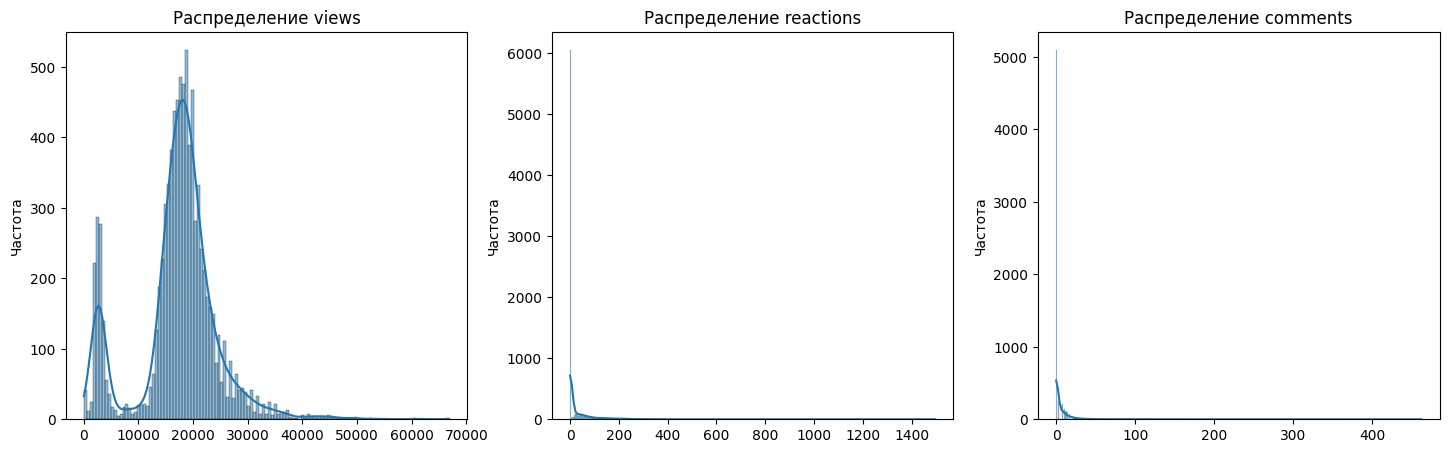

In [ ]:
num_columns = 3
num_rows = (len(numerical_features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))
fig.tight_layout(pad=3.0)

# Приведение к 2D массиву, если нужно
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(df[numerical_features]):
    row, col = divmod(i, num_columns)
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")

# Удаление пустых осей
for i in range(len(numerical_features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()


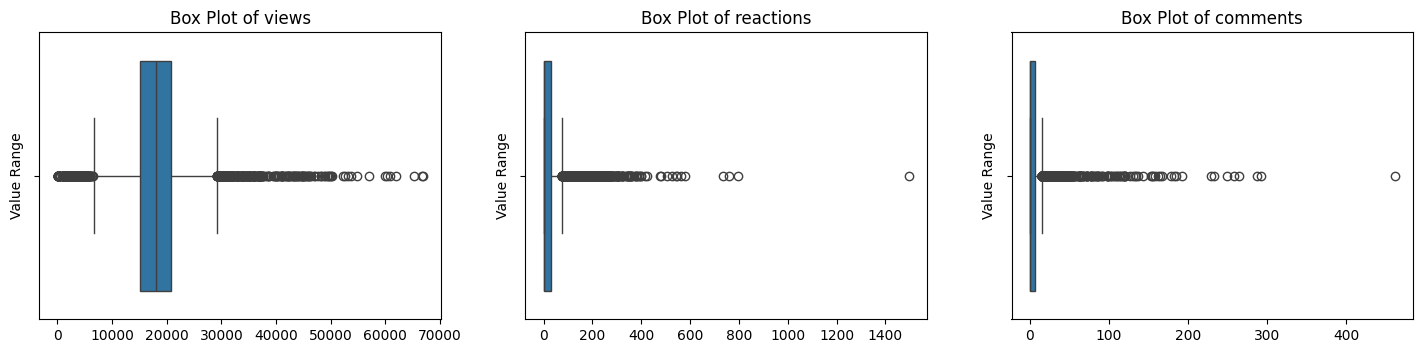

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_columns = 3
num_rows = (len(numerical_features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 4))
fig.tight_layout(pad=3.0)

# Приводим axes к 2D-массиву, если нужно
if num_rows == 1:
    axes = np.expand_dims(axes, axis=0)  # делаем (1, num_columns)
if num_columns == 1:
    axes = np.expand_dims(axes, axis=1)  # делаем (num_rows, 1)

for i, column in enumerate(numerical_features):
    row, col = divmod(i, num_columns)
    sns.boxplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f"Box Plot of {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Value Range")

# Удаляем лишние пустые оси
for i in range(len(numerical_features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()


In [ ]:
columns = ['reactions', 'comments']

for column in columns:
   Q1 = df[column].quantile(0.25)
   Q3 = df[column].quantile(0.75)
   IQR = Q3 - Q1
   lower_bound = Q1 - 1.5 * IQR
   upper_bound = Q3 + 1.5 * IQR
   outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
   df = df[(df[column] > lower_bound) & (df[column] < upper_bound)]
outliers

,id_post,date,text,views,reactions,comments,hour,weekday
37,13248,2025-04-05 08:19:53+00:00,"**Всё программирование, которое должен знать П...",11179,37,12,8,Saturday
50,13221,2025-03-30 11:44:01+00:00,**Переключение между контекстами убивает эффек...,13758,71,13,11,Sunday
65,13197,2025-03-23 09:22:39+00:00,[**XPipe**](https://github.com/xpipe-io/xpipe?...,15863,49,46,9,Sunday
70,13186,2025-03-20 15:33:01+00:00,**Spotube: кросс-платформенный клиент Spotify ...,15651,52,13,15,Thursday
80,13175,2025-03-15 14:02:41+00:00,**Необычные способы ~~изобрести велосипед~~ хо...,15884,47,13,14,Saturday
...,...,...,...,...,...,...,...,...
4309,6149,2020-10-02 16:37:09+00:00,**Компания DigitalOcean запустила Hacktoberfes...,18945,0,12,16,Friday
4310,6147,2020-10-02 13:03:03+00:00,[​](http://chnly.pro/file/71afb02fab514ae6943b...,19695,0,11,13,Friday
4312,6142,2020-10-01 18:33:03+00:00,[​](http://chnly.pro/file/24cecc118f5e42378014...,19999,0,38,18,Thursday
4314,6139,2020-10-01 08:16:05+00:00,**Теперь на языке Swift можно создавать прилож...,20527,0,12,8,Thursday


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8750 entries, 0 to 8749
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   id_post    8750 non-null   int64              
 1   date       8750 non-null   datetime64[ns, UTC]
 2   text       8750 non-null   object             
 3   views      8750 non-null   int64              
 4   reactions  8750 non-null   int64              
 5   comments   8750 non-null   int64              
 6   hour       8750 non-null   int32              
 7   weekday    8750 non-null   object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(4), object(2)
memory usage: 512.8+ KB


In [ ]:
num_columns = 3
num_rows = (len(numerical_features) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 5))
fig.tight_layout(pad=3.0)

# Приведение к 2D массиву, если нужно
if num_rows == 1:
    axes = axes.reshape(1, -1)

for i, column in enumerate(df[numerical_features]):
    row, col = divmod(i, num_columns)
    sns.histplot(df[column], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f"Распределение {column}")
    axes[row, col].set_xlabel("")
    axes[row, col].set_ylabel("Частота")

# Удаление пустых осей
for i in range(len(numerical_features), num_rows * num_columns):
    fig.delaxes(axes.flatten()[i])

plt.show()

NameError: name 'numerical_features' is not defined

In [ ]:
df.describe()

,id_post,views,reactions,comments,hour
count,6608.000000,6608.000000,6608.000000,6608.000000,6608.000000
mean,5056.588378,17141.631356,7.207476,1.060684,12.677209
std,3475.960597,8068.582442,16.626364,2.274378,4.283832
min,278.000000,30.000000,0.000000,0.000000,0.000000
25%,2089.750000,14735.750000,0.000000,0.000000,9.000000
50%,4382.000000,18490.000000,0.000000,0.000000,12.000000
75%,7471.750000,21527.250000,0.000000,0.000000,16.000000
max,13300.000000,66829.000000,74.000000,9.000000,23.000000


###Нужное

Добавим метку

In [ ]:
df.describe()

,id_post,views,reactions,comments,hour
count,8750.000000,8750.000000,8750.000000,8750.000000,8750.000000
mean,6257.979314,17360.961257,27.378629,5.574057,12.367543
std,3826.691349,7506.308143,61.328095,15.384208,4.149206
min,278.000000,30.000000,0.000000,0.000000,0.000000
25%,2845.250000,15140.250000,0.000000,0.000000,9.000000
50%,6045.000000,17991.000000,0.000000,0.000000,12.000000
75%,9590.750000,20763.500000,30.000000,6.000000,16.000000
max,13302.000000,66829.000000,1496.000000,462.000000,23.000000


In [ ]:
df['popularity'] = (df['views'] > 18000).astype(int)

In [ ]:
df['popularity'].value_counts()


,count
popularity,
0,4387
1,4363


Делим на выборки

In [ ]:
train_val_df, test_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['popularity'])
train_df, val_df = train_test_split(train_val_df, test_size=0.15, random_state=42, stratify=train_val_df['popularity'])

print(f"Train size: {len(train_df)}")
print(f"Validation size: {len(val_df)}")
print(f"Test size: {len(test_df)}")

Train size: 6321
Validation size: 1116
Test size: 1313


In [ ]:
train_df.head()

,id_post,date,text,views,reactions,comments,hour,weekday,popularity
5034,4989,2020-02-11 11:27:03+00:00,**«Клавиатуры Apple просто кошмарные»**\n\nТай...,24190,0,0,11,Tuesday,1
3893,6772,2021-01-14 14:37:31+00:00,[​​](https://telegra.ph/file/db52690d951f25b63...,19172,1,24,14,Thursday,1
7603,1501,2017-04-30 12:51:05+00:00,Google запустила новый курс для разработчиков....,9240,0,0,12,Sunday,0
1504,10761,2023-05-23 11:45:00+00:00,[​](https://telegra.ph/file/5dbe062e7dd0301078...,15515,40,15,11,Tuesday,0
7859,1217,2017-03-14 08:44:56+00:00,Поисковик Google наконец научился обрабатывать...,2857,0,0,8,Tuesday,0


Предобработка

In [ ]:
nltk.download('stopwords')
morph = pymorphy3.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def is_cyrillic(word):
    return bool(re.fullmatch(r'[а-яё]+', word))

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    text = re.sub(r'[^a-zа-яё\s]', '', text)

    tokens = text.split()

    cleaned_tokens = []
    for token in tokens:
        if token in stop_words:
            continue
        if is_cyrillic(token):
            token = morph.parse(token)[0].normal_form
        cleaned_tokens.append(token)

    return ' '.join(cleaned_tokens)

In [ ]:
train_df['clean_text'] = train_df['text'].apply(preprocess_text)
val_df['clean_text'] = val_df['text'].apply(preprocess_text)
test_df['clean_text'] = test_df['text'].apply(preprocess_text)

In [ ]:
#Доп. признаки
datasets = [train_df, val_df, test_df]

for df in datasets:
    df['text_length'] = df['clean_text'].apply(len)
    df['engagement'] = df['reactions'] + df['comments']
    df['engagement_rate'] = df['engagement'] / df['views']

In [ ]:
train_df.to_csv('/content/drive/MyDrive/анализ соц медиа на python/train_dataset.csv', index=False, encoding='utf-8')
val_df.to_csv('/content/drive/MyDrive/анализ соц медиа на python/val_dataset.csv', index=False, encoding='utf-8')
test_df.to_csv('/content/drive/MyDrive/анализ соц медиа на python/test_dataset.csv', index=False, encoding='utf-8')

In [ ]:
train_df

,id_post,date,text,views,reactions,comments,hour,weekday,popularity,clean_text,text_length,engagement,engagement_rate
5034,4989,2020-02-11 11:27:03+00:00,**«Клавиатуры Apple просто кошмарные»**\n\nТай...,24190,0,0,11,Tuesday,1,клавиатура apple просто кошмарный тайка вайтит...,330,0,0.000000
3893,6772,2021-01-14 14:37:31+00:00,[​​](https://telegra.ph/file/db52690d951f25b63...,19172,1,24,14,Thursday,1,заменить участник голубой огонёк николас кейдж...,149,25,0.001304
7603,1501,2017-04-30 12:51:05+00:00,Google запустила новый курс для разработчиков....,9240,0,0,12,Sunday,0,google запустить новый курс разработчик посвят...,111,0,0.000000
1504,10761,2023-05-23 11:45:00+00:00,[​](https://telegra.ph/file/5dbe062e7dd0301078...,15515,40,15,11,Tuesday,0,знать код страница найти возможно ещё парочка ...,133,55,0.003545
7859,1217,2017-03-14 08:44:56+00:00,Поисковик Google наконец научился обрабатывать...,2857,0,0,8,Tuesday,0,поисковик google научиться обрабатывать спецси...,99,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6136,3456,2019-02-03 11:16:07+00:00,**Развёрнутое руководство по Sass/SCSS**\n\nht...,24259,0,0,11,Sunday,1,развернуть руководство sassscss современный cs...,323,0,0.000000
3183,7849,2021-08-05 10:35:25+00:00,[​](http://chnly.pro/file/305a115d080a42c7a6b9...,18215,0,4,10,Thursday,1,вопрос который точно стоить задать работодател...,351,4,0.000220
1069,11374,2023-11-02 14:01:37+00:00,**Подборка актуальных вакансий**\n\n— [Специал...,13645,18,0,14,Thursday,0,подборка актуальный вакансия специалист технич...,701,18,0.001319
4041,6554,2020-12-09 05:45:04+00:00,**Microsoft запатентовала рейтинг для оценки с...,18028,0,0,5,Wednesday,1,microsoft запатентовать рейтинг оценка совещан...,465,0,0.000000


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6321 entries, 5034 to 1628
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id_post          6321 non-null   int64              
 1   date             6321 non-null   datetime64[ns, UTC]
 2   text             6321 non-null   object             
 3   views            6321 non-null   int64              
 4   reactions        6321 non-null   int64              
 5   comments         6321 non-null   int64              
 6   hour             6321 non-null   int32              
 7   weekday          6321 non-null   object             
 8   popularity       6321 non-null   int64              
 9   clean_text       6321 non-null   object             
 10  text_length      6321 non-null   int64              
 11  engagement       6321 non-null   int64              
 12  engagement_rate  6321 non-null   float64            
dtypes: datetime64[ns, UT

## Лабораторная работа 5

### Мешок слов (Bag of Words, BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train_df['clean_text']).toarray()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_val = vectorizer.transform(val_df['clean_text']).toarray()
X_test = vectorizer.transform(test_df['clean_text']).toarray()

In [ ]:
len(vectorizer.vocabulary_)

19275

In [ ]:
vectorizer.get_feature_names_out()[:20]

array(['aaaкласса', 'aaaокружение', 'ab', 'abap', 'abapразработчик',
       'abbyy', 'abilities', 'ability', 'abilityaware', 'about',
       'aboutcloud', 'above', 'absence', 'absolute', 'abтеста',
       'abтестирование', 'abтестированию', 'abтестирования', 'abтесты',
       'academic'], dtype=object)

In [ ]:
nonzero_indices = X_train[0].nonzero()[0]
print([vectorizer.get_feature_names_out()[i] for i in nonzero_indices])

['qa', 'бесплатный', 'большой', 'важный', 'возможность', 'грамотный', 'команда', 'материал', 'навык', 'очень', 'программист', 'прокачка', 'разработка', 'свой', 'составить', 'список', 'ссылка', 'тестирование', 'тестировщик', 'член']


In [ ]:
import joblib
#сохранение предобученных моделей sklearn
joblib.dump(vectorizer, '/content/drive/MyDrive/анализ соц медиа на python/Lab_5/BoW_pretrained.joblib')

#загрузка предобученных моделей
BoW_pretrained = joblib.load('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/BoW_pretrained.joblib')

In [ ]:
BoW_pretrained.transform(['aaaкласса', 'aaaокружение', 'ab']).toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]])

In [ ]:
pd.DataFrame(X_train).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_train_vec_BoW.csv', index=False)
pd.DataFrame(X_val).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_val_vec_BoW.csv', index=False)
pd.DataFrame(X_test).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_test_vec_BoW.csv', index=False)

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
X_train = tfidf_vectorizer.fit_transform(train_df['clean_text']).toarray()

X_val = tfidf_vectorizer.transform(val_df['clean_text']).toarray()
X_test = tfidf_vectorizer.transform(test_df['clean_text']).toarray()

In [ ]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfidf_vectorizer.get_feature_names_out()[-20:]

array(['ярославль', 'ярославский', 'ярость', 'ярый', 'ясно', 'ясный',
       'ячеекклетка', 'ячеистый', 'ячейка', 'яша', 'яшин', 'ящерица',
       'ящик', 'ёкнуть', 'ёлка', 'ёлочка', 'ёлочный', 'ёмко', 'ёмкость',
       'ёпт'], dtype=object)

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

(4773, 19275) (843, 19275) (992, 19275)


In [ ]:
# Для сохранения и загрузки
joblib.dump(tfidf_vectorizer, '/content/drive/MyDrive/анализ соц медиа на python/Lab_5/TF_IDF_pretrained.joblib')

tfidf_pretrained = joblib.load('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/TF_IDF_pretrained.joblib')

In [ ]:
tfidf_pretrained.transform(['ёмко', 'ёмкость', 'ёпт']).toarray()

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
pd.DataFrame(X_train).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_train_vec_TF_IDF.csv', index=False)
pd.DataFrame(X_val).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_val_vec_TF_IDF.csv', index=False)
pd.DataFrame(X_test).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_test_vec_TF_IDF.csv', index=False)

### Word2Vec

In [ ]:
!pip install --upgrade numpy gensim

  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)


In [ ]:
import nltk
from string import punctuation
from pymorphy3 import MorphAnalyzer
from gensim.models import Word2Vec
nltk.download('punkt_tab')

morph = MorphAnalyzer()
punctuations = list(punctuation)
extra_punct = ['``','...',"''",'«','»','…','”','”','“','-','–','..']
punctuations.extend(extra_punct)


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:

def prep_text(text, morph = morph, punctuations = punctuations):
    text_token = nltk.word_tokenize(text)
    text_word=[morph.parse(x.lower())[0].normal_form for x in text_token if x not in punctuations]
    return text_word

# Применяем предобработку
X_token_train = [prep_text(text) for text in train_df['clean_text']]
X_token_val = [prep_text(text) for text in val_df['clean_text']]
X_token_test = [prep_text(text) for text in test_df['clean_text']]

In [ ]:
w2v_model = Word2Vec(sentences=X_token_train, vector_size=300, window=5, min_count=1, epochs=100)

# Получаем словарь модели
vocab = list(w2v_model.wv.key_to_index)


print("Первые 10 слов словаря:", vocab[:10])
print("Размер словаря:", len(vocab))

Первые 10 слов словаря: ['который', 'год', 'это', 'работа', 'разработчик', 'новый', 'свой', 'код', 'опыт', 'дать']
Размер словаря: 22150


In [ ]:
import numpy as np
#вектора каждого слова из предложения
preprocessing_text = ['кот', 'любить', 'тыгыдыкать']
vectors_word = []
for i in preprocessing_text:
  if i in vocab:
    vectors_word.append(w2v_model.wv[list(w2v_model.wv.index_to_key)[vocab.index(i)]])
  else:
    vectors_word.append(np.zeros(300))
vector_text = np.mean(vectors_word, axis = 0)

In [ ]:
#векторизация каждого слова по отдельности
print(vectors_word)

[array([ 5.88878453e-01,  1.48376989e+00,  8.12659740e-01,  6.09058857e-01,
        1.33264315e+00,  1.95973754e+00, -3.96404624e-01,  4.79142457e-01,
        1.36182368e+00, -6.57133818e-01, -1.13861191e+00,  2.27832496e-01,
       -2.91920975e-02, -5.89934945e-01,  9.21105519e-02,  5.23980200e-01,
        8.42746496e-01, -2.58084744e-01, -8.66401941e-02, -4.28461403e-01,
        2.21642360e-01,  4.20439750e-01, -3.10777932e-01, -1.35844827e+00,
       -1.08260620e+00,  1.70453638e-02, -4.42649841e-01,  1.58733909e-03,
       -2.04477534e-01,  1.75749391e-01, -4.30602372e-01,  1.15908051e+00,
       -3.65881592e-01,  6.34654045e-01, -1.42402196e+00,  8.71070385e-01,
        8.97753954e-01,  1.24183488e+00,  4.70594257e-01, -1.09732735e+00,
        1.26351804e-01,  2.75892437e-01, -2.79087901e-01,  5.63389026e-02,
       -1.76594448e+00, -2.15559378e-01,  1.43899262e+00,  1.35999289e-03,
       -7.04726696e-01,  2.50759125e-01, -1.07959890e+00, -4.93533202e-02,
       -1.74900401e+00, 

In [ ]:
#векторизация одного текста целиком
print(vector_text)

[ 0.63508938  0.03670732  0.19413871 -0.29497488  0.01944208  0.76158027
 -0.22792623  0.32770686  1.10344823 -0.70065351 -0.61418734 -0.07428497
  0.26789482 -0.65480904  0.29744549  0.50025489  0.02763313 -0.22741213
 -0.17164577 -0.4582488   0.67444821  0.24697442 -0.78042866 -0.41482297
 -0.52932096  0.40548797 -0.42063866 -0.10511632 -0.26576389  0.18038092
 -0.25267206  0.13071092 -0.2910867   0.47670633 -0.24344979 -0.49160059
  0.43088256  0.30860973 -0.09487115 -0.9119664   0.14479665  0.43072822
  0.27552132  0.01321292  0.06497085 -0.19249102  0.12952737  0.17105841
  0.17597536 -0.23227827 -0.77370699 -0.0481905  -0.8201678   0.30910785
  0.58262433 -0.25810484 -0.92254853 -0.0589695  -0.67648985 -0.38067494
  0.49872234 -0.53190212 -0.24223884 -0.30978195 -0.67921579  0.23023008
  0.01890339  0.4130071  -0.63371774 -0.23181484 -0.22381404  0.64200314
 -0.20614766 -0.52843879 -0.64568907 -0.11502484  0.19057835 -0.69736401
  0.13935371  0.0527865   0.19786088  0.99857899 -0

In [ ]:
vocab

['который',
 'год',
 'это',
 'работа',
 'разработчик',
 'новый',
 'свой',
 'код',
 'опыт',
 'дать',
 'язык',
 'статья',
 'компания',
 'проект',
 'google',
 'разработка',
 'самый',
 'работать',
 'программирование',
 'python',
 'удалённый',
 'инструмент',
 'такой',
 'система',
 'использовать',
 'сайт',
 'программист',
 'нейросеть',
 'время',
 'другой',
 'приложение',
 'игра',
 'москва',
 'стать',
 'помощь',
 'пользователь',
 'всё',
 'технология',
 'один',
 'первый',
 'новость',
 'ещё',
 'наш',
 'задача',
 'подборка',
 'команда',
 'какой',
 'создать',
 'человек',
 'курс',
 'версия',
 'рассказывать',
 'вакансия',
 'рассказать',
 'также',
 'ия',
 'сделать',
 'мочь',
 'microsoft',
 'алгоритм',
 'обучение',
 'помочь',
 'хороший',
 'windows',
 'сервис',
 'java',
 'c',
 'собеседование',
 'день',
 'эксперт',
 'каждый',
 'получить',
 'просто',
 'нужно',
 'создание',
 'ваш',
 'вопрос',
 'безопасность',
 'видео',
 'совет',
 'пример',
 'javascript',
 'интересный',
 'знать',
 'решение',
 'несколько',

In [ ]:
import numpy as np

def text_to_vec(tokens, model, vocab):

    vector_size = 300
    vectors = []

    for word in tokens:
        if word in vocab:
            try:
                word_idx = vocab.index(word)
                model_word = model.wv.index_to_key[word_idx]
                vectors.append(model.wv[model_word])
            except (IndexError, KeyError):
                # Если индекс выходит за границы или слова нет в модели
                vectors.append(np.zeros(vector_size))
        else:
            vectors.append(np.zeros(vector_size))

    # Делаем вектор нужной размерности во избежание ошибок
    if not vectors:
        return np.zeros(vector_size)

    mean_vector = np.mean(vectors, axis=0)
    return mean_vector

X_train_vec = np.array([text_to_vec(tokens, w2v_model, vocab) for tokens in X_token_train])
X_val_vec = np.array([text_to_vec(tokens, w2v_model, vocab) for tokens in X_token_val])
X_test_vec = np.array([text_to_vec(tokens, w2v_model, vocab) for tokens in X_token_test])

In [ ]:
vocab_size = len(w2v_model.wv.key_to_index)
print(f"Количество уникальных слов в словаре: {vocab_size}")
print(w2v_model.wv.key_to_index)

Количество уникальных слов в словаре: 22150
{'который': 0, 'год': 1, 'это': 2, 'работа': 3, 'разработчик': 4, 'новый': 5, 'свой': 6, 'код': 7, 'опыт': 8, 'дать': 9, 'язык': 10, 'статья': 11, 'компания': 12, 'проект': 13, 'google': 14, 'разработка': 15, 'самый': 16, 'работать': 17, 'программирование': 18, 'python': 19, 'удалённый': 20, 'инструмент': 21, 'такой': 22, 'система': 23, 'использовать': 24, 'сайт': 25, 'программист': 26, 'нейросеть': 27, 'время': 28, 'другой': 29, 'приложение': 30, 'игра': 31, 'москва': 32, 'стать': 33, 'помощь': 34, 'пользователь': 35, 'всё': 36, 'технология': 37, 'один': 38, 'первый': 39, 'ещё': 40, 'новость': 41, 'наш': 42, 'задача': 43, 'подборка': 44, 'команда': 45, 'какой': 46, 'создать': 47, 'человек': 48, 'курс': 49, 'версия': 50, 'рассказывать': 51, 'вакансия': 52, 'рассказать': 53, 'также': 54, 'ия': 55, 'сделать': 56, 'мочь': 57, 'microsoft': 58, 'алгоритм': 59, 'обучение': 60, 'помочь': 61, 'хороший': 62, 'windows': 63, 'сервис': 64, 'java': 65, 'c

In [ ]:
#посмотреть ближайшие слова
w2v_model.wv.most_similar('разработка')

[('создание', 0.2904225289821625),
 ('автоматизация', 0.2840465307235718),
 ('разрабатывать', 0.2839258015155792),
 ('построение', 0.27270811796188354),
 ('взаимодействие', 0.25958454608917236),
 ('различие', 0.25654712319374084),
 ('вебразработка', 0.2558174431324005),
 ('реализация', 0.24713048338890076),
 ('ma', 0.24699506163597107),
 ('гринат', 0.2462143748998642)]

In [ ]:
#посмотреть косинусную близость двух слов
print(w2v_model.wv.similarity('разработка', 'google'))
print(w2v_model.wv.similarity('разработка', 'разработчик'))
print(w2v_model.wv.most_similar(positive=['разработка','разработчик'], negative=['проектирование'], topn=1))

-0.027841603
0.19744997
[('компанияразработчик', 0.33289381861686707)]


In [ ]:
w2v_model.save('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/W2V_pretrained.bin')

pd.DataFrame(X_train_vec).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_train_vec_W2V.csv', index=False)
pd.DataFrame(X_val_vec).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_val_vec_W2V.csv', index=False)
pd.DataFrame(X_test_vec).to_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_test_vec_W2V.csv', index=False)

##Лабораторная работа 6

In [ ]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/train_dataset.csv')
val_df = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/val_dataset.csv')
test_df = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/test_dataset.csv')

In [ ]:
X_train_BoW = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_train_vec_BoW.csv')
X_val_BoW = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_val_vec_BoW.csv')
X_test_BoW = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_test_vec_BoW.csv')

X_train_BoW['label'] = train_df['popularity']
X_val_BoW['label'] = val_df['popularity']
X_test_BoW['label'] = test_df['popularity']


X_train_TF_IDF = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_train_vec_TF_IDF.csv')
X_val_TF_IDF = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_val_vec_TF_IDF.csv')
X_test_TF_IDF = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_test_vec_TF_IDF.csv')

X_train_TF_IDF['label'] = train_df['popularity']
X_val_TF_IDF['label'] = val_df['popularity']
X_test_TF_IDF['label'] = test_df['popularity']


X_train_W2V = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_train_vec_W2V.csv')
X_val_W2V = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_val_vec_W2V.csv')
X_test_W2V = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_test_vec_W2V.csv')

X_train_W2V['label'] = train_df['popularity']
X_val_W2V['label'] = val_df['popularity']
X_test_W2V['label'] = test_df['popularity']

Задача: определить, чем отличаются популярные посты, чтобы писать в канале только такие и получать больше просмотров/реакций/комментариев

Возьмем в качестве основной метрики accuracy, так как классы сбалансированные (примерно 50/50). Но и остальные метрики тоже будем рассчитывать, ибо комплексную оценку и сравнение никто не отменял.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

def train_model(df_train, df_val, df_test, name_dataset, classifier=None):
    X_train = df_train.drop(columns='label').values
    y_train = df_train['label'].values

    X_val = df_val.drop(columns='label').values
    y_val = df_val['label'].values

    X_test = df_test.drop(columns='label').values
    y_test = df_test['label'].values

    clf_pretrained = classifier.fit(X_train, y_train)

    model_path = f'/content/drive/MyDrive/анализ соц медиа на python/Lab_5/{type(classifier).__name__}_for_{name_dataset}.joblib'
    joblib.dump(clf_pretrained, model_path)

    y_pred_val = clf_pretrained.predict(X_val)
    y_pred_test = clf_pretrained.predict(X_test)

    def add_metrics(y_true, y_pred, dataset_name):
        results.append({
            'Vectorizer': name_dataset,
            'Model': type(classifier).__name__,
            'Dataset': dataset_name,
            'Accuracy': accuracy_score(y_true, y_pred),
            'Precision': precision_score(y_true, y_pred, average='macro', zero_division=0),
            'Recall': recall_score(y_true, y_pred, average='macro', zero_division=0),
            'F1-score': f1_score(y_true, y_pred, average='macro', zero_division=0)
        })

    add_metrics(y_val, y_pred_val, 'Validation')
    add_metrics(y_test, y_pred_test, 'Test')


### Логистическая регрессия

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_LR = LogisticRegression(
        penalty = 'l2', #{‘l1’, ‘l2’, ‘elasticnet’, None}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 100, #int, default=100
        n_jobs = -1, #int, default=None
)

results = []
train_model(X_train_BoW, X_val_BoW, X_test_BoW, name_dataset='BoW', classifier=clf_LR)
train_model(X_train_TF_IDF, X_val_TF_IDF, X_test_TF_IDF, name_dataset='TF-IDF', classifier=clf_LR)
train_model(X_train_W2V, X_val_W2V, X_test_W2V, name_dataset='Word2Vec', classifier=clf_LR)

### Метод опорных векторов

In [ ]:
from sklearn.svm import LinearSVC

clf_lsvc = LinearSVC(
        penalty = 'l2', #{‘l1’, ‘l2’}, default=’l2’
        C = 0.2, #float, default=1.0
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42,
        max_iter = 2000 #int, default=1000
)

train_model(X_train_BoW, X_val_BoW, X_test_BoW, name_dataset='BoW', classifier=clf_lsvc)
train_model(X_train_TF_IDF, X_val_TF_IDF, X_test_TF_IDF, name_dataset='TF-IDF', classifier=clf_lsvc)
train_model(X_train_W2V, X_val_W2V, X_test_W2V, name_dataset='Word2Vec', classifier=clf_lsvc)

### Случайный лес

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf =  RandomForestClassifier(
        n_estimators = 200, #int, default=100
        criterion = 'gini', #{“gini”, “entropy”, “log_loss”}, default=”gini”
        max_depth = 200, #int, default=None
        class_weight = 'balanced', #dict or ‘balanced’, default=None
        random_state = 42
)

train_model(X_train_BoW, X_val_BoW, X_test_BoW, name_dataset='BoW', classifier=clf_rf)
train_model(X_train_TF_IDF, X_val_TF_IDF, X_test_TF_IDF, name_dataset='TF-IDF', classifier=clf_rf)
train_model(X_train_W2V, X_val_W2V, X_test_W2V, name_dataset='Word2Vec', classifier=clf_rf)

### Метрики

In [ ]:
results_df = pd.DataFrame(results)
results_df

,Vectorizer,Model,Dataset,Accuracy,Precision,Recall,F1-score
0,BoW,LogisticRegression,Validation,0.457888,0.457324,0.457717,0.456539
1,BoW,LogisticRegression,Test,0.513105,0.513189,0.513174,0.512993
2,TF-IDF,LogisticRegression,Validation,0.478055,0.478028,0.478031,0.478019
3,TF-IDF,LogisticRegression,Test,0.502016,0.501969,0.501967,0.501917
4,Word2Vec,LogisticRegression,Validation,0.603047,0.604491,0.603244,0.601934
5,Word2Vec,LogisticRegression,Test,0.580350,0.580938,0.580440,0.579741
6,BoW,LinearSVC,Validation,0.476868,0.476510,0.476706,0.475688
7,BoW,LinearSVC,Test,0.483871,0.483915,0.483928,0.483795
8,TF-IDF,LinearSVC,Validation,0.470937,0.470792,0.470854,0.470609
9,TF-IDF,LinearSVC,Test,0.493952,0.493997,0.494000,0.493900


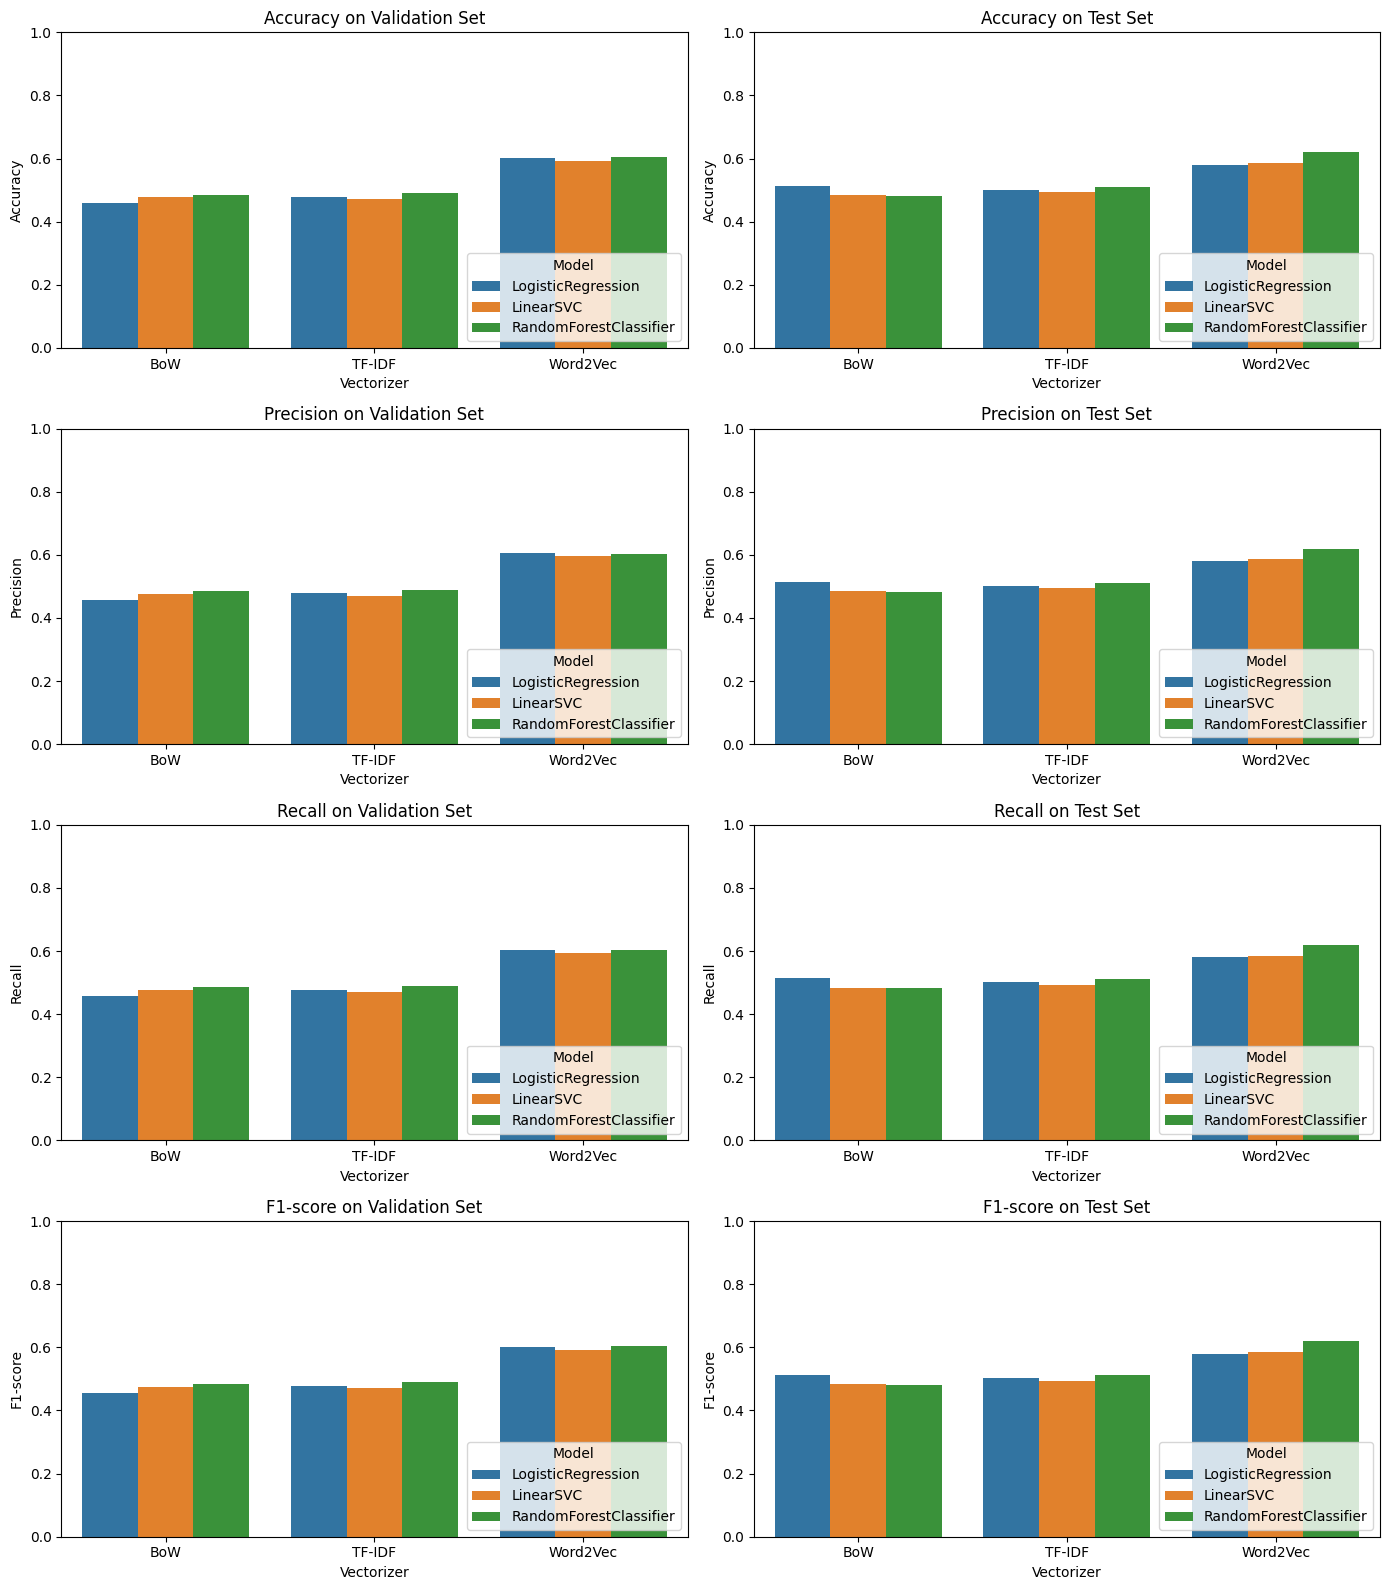

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df = results_df

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
datasets = ['Validation', 'Test']

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 16))
plt.subplots_adjust(hspace=0.4)

for i, metric in enumerate(metrics):
    for j, dataset in enumerate(datasets):
        ax = axes[i, j]
        sns.barplot(
            x='Vectorizer',
            y=metric,
            hue='Model',
            data=df[df['Dataset'] == dataset],
            errorbar=None,
            ax=ax
        )
        ax.set_title(f'{metric} on {dataset} Set')
        ax.set_ylim(0, 1)
        ax.legend(loc='lower right', title='Model')

plt.tight_layout()
plt.show()

## Лабораторная работа 7

In [3]:
import pandas as pd

train_df = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/train_dataset.csv')
val_df = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/val_dataset.csv')
test_df = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/test_dataset.csv')

X_train_W2V = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_train_vec_W2V.csv')
X_val_W2V = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_val_vec_W2V.csv')
X_test_W2V = pd.read_csv('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/X_test_vec_W2V.csv')

X_train_W2V['label'] = train_df['popularity']
X_val_W2V['label'] = val_df['popularity']
X_test_W2V['label'] = test_df['popularity']


X_train = X_train_W2V.drop(columns='label').values
y_train = X_train_W2V['label'].values

X_val = X_val_W2V.drop(columns='label').values
y_val = X_val_W2V['label'].values

X_test = X_test_W2V.drop(columns='label').values
y_test = X_test_W2V['label'].values

In [8]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
import numpy as np

pipeline = Pipeline([('clf', RandomForestClassifier())])

#сетка параметров
parameters = {
    'clf__n_estimators': [50, 100, 200],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__max_features': ['sqrt', 'log2']
}

halving_search = HalvingGridSearchCV(
    estimator=pipeline,
    param_grid=parameters,
    cv=5,
    factor=2,
    random_state=0,
)


In [9]:
halving_search.fit(X_train, y_train)

HalvingGridSearchCV(estimator=Pipeline(steps=[('clf',
                                               RandomForestClassifier())]),
                    factor=2,
                    param_grid={'clf__max_depth': [None, 10, 20, 30],
                                'clf__max_features': ['sqrt', 'log2'],
                                'clf__n_estimators': [50, 100, 200]},
                    random_state=0)

In [10]:
best_parameters = halving_search.best_params_
print("Лучшие параметры:")
for param_name in sorted(best_parameters.keys()):
    print(f"{param_name}: {best_parameters[param_name]}")

Лучшие параметры:
clf__max_depth: 30
clf__max_features: sqrt
clf__n_estimators: 200


In [11]:
from sklearn.metrics import classification_report

y_pred_optimized = halving_search.predict(X_test)
print("\nОтчет классификации:")
print(classification_report(y_test, y_pred_optimized, digits=4))


Отчет классификации:
              precision    recall  f1-score   support

           0     0.6250    0.6231    0.6240       658
           1     0.6225    0.6244    0.6235       655

    accuracy                         0.6238      1313
   macro avg     0.6238    0.6238    0.6238      1313
weighted avg     0.6238    0.6238    0.6238      1313



<Figure size 1000x600 with 0 Axes>

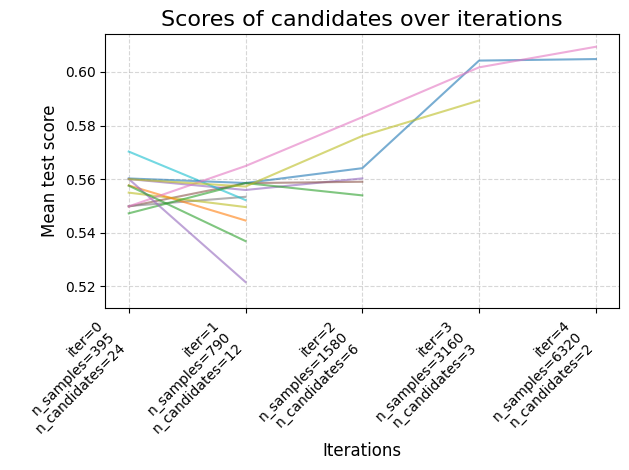

In [13]:
import matplotlib.pyplot as plt

results = pd.DataFrame(halving_search.cv_results_)
results["params_str"] = results.params.apply(str)
results.drop_duplicates(subset=("params_str", "iter"), inplace=True)

mean_scores = results.pivot(
    index="iter",
    columns="params_str",
    values="mean_test_score",
)

plt.figure(figsize=(10, 6))
ax = mean_scores.plot(legend=False, alpha=0.6)

labels = [
    f"iter={i}\nn_samples={halving_search.n_resources_[i]}\nn_candidates={halving_search.n_candidates_[i]}"
    for i in range(halving_search.n_iterations_)
]

ax.set_xticks(range(halving_search.n_iterations_))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_title("Scores of candidates over iterations", fontsize=16)
ax.set_ylabel("Mean test score", fontsize=12)
ax.set_xlabel("Iterations", fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Подготовка итогового классификатора

In [18]:
from sklearn.ensemble import RandomForestClassifier

clf_rf =  RandomForestClassifier(
        n_estimators = 200,
        criterion = 'gini',
        max_depth = 30,
        max_features = 'sqrt',
        class_weight = 'balanced',
        random_state = 42
)
results = []
train_model(X_train_W2V, X_val_W2V, X_test_W2V, name_dataset='Word2Vec', classifier=clf_rf)



In [19]:
results_df = pd.DataFrame(results)
results_df

,Vectorizer,Model,Dataset,Accuracy,Precision,Recall,F1-score
0,Word2Vec,RandomForestClassifier,Validation,0.601254,0.601248,0.601246,0.601246
1,Word2Vec,RandomForestClassifier,Test,0.620716,0.620717,0.620717,0.620716


Сборка пайплайна

In [24]:
from sklearn.pipeline import Pipeline
import joblib
import re
from sklearn.base import BaseEstimator, TransformerMixin
import gensim
import nltk
import pymorphy3
from nltk.corpus import stopwords
from gensim.models import Word2Vec

In [14]:
nltk.download('stopwords')
morph = pymorphy3.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
class TextPreprocessing(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.morph = pymorphy3.MorphAnalyzer()
        self.stop_words = set(stopwords.words('russian'))

    def fit(self, corpus):
        return self

    def transform(self, corpus):
        return [self.clean_text(text) for text in corpus]


    def is_cyrillic(self, word):
       return bool(re.fullmatch(r'[а-яё]+', word))

    def clean_text(self, text):
       text = text.lower()
       text = re.sub(r'http\S+|www\S+|https\S+', '', text)
       text = re.sub(r'[^a-zа-яё\s]', '', text)

       tokens = text.split()

       cleaned_tokens = []
       for token in tokens:
           if token in stop_words:
               continue
           if self.is_cyrillic(token):
               token = morph.parse(token)[0].normal_form
           cleaned_tokens.append(token)

       return ' '.join(cleaned_tokens)

In [21]:
example_text = "Разработчики разработали разработку!"
preprocessor = TextPreprocessing()
tokens = preprocessor.transform([example_text])
tokens

['разработчик разработать разработка']

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class Word2VecVectorizer(BaseEstimator, TransformerMixin):
    def __init__(self, word2vec_model):
        self.word2vec_model = word2vec_model
        self.vector_size = word2vec_model.vector_size

    def transform(self, texts):
        vectors = []
        for text in texts:
            words = text.split() if isinstance(text, str) else text

            word_vectors = []
            for word in words:
                if word in self.word2vec_model.wv:
                    word_vectors.append(self.word2vec_model.wv[word])
                else:
                    word_vectors.append(np.zeros(self.vector_size))

            if word_vectors:
                vectors.append(np.mean(word_vectors, axis=0))
            else:
                vectors.append(np.zeros(self.vector_size))

        return np.array(vectors)

In [40]:
#подгружаем предобученный векторизатор и классификатор
vectorizer = Word2Vec.load('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/W2V_pretrained.bin')
classifier = joblib.load('/content/drive/MyDrive/анализ соц медиа на python/Lab_5/RandomForestClassifier_for_Word2Vec.joblib')
model_sentiment_analysis = Pipeline(
    [('preproc', TextPreprocessing()),
     ('vec', Word2VecVectorizer(vectorizer)),
     ('clf', classifier)])

In [43]:
model_sentiment_analysis.predict(['С сегодняшнего дня Skype прекращает свою работу Press 🫡 для легенды'])

array([0])